In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tqdm.auto import tqdm
import tensorflow as tf

#data processing
import re, string
# import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

EDA Process, Random Forest,Decision tree, Adaboost, SVM,Multi Layer Perceptron, LSTM

In [ ]:
#Read the dataset
df1 = pd.read_csv('2022-12-09-enriched.csv')
df2 = pd.read_csv('2022-07-04-enriched.csv')
df3 = pd.read_csv('2022-06-27-enriched.csv')
df4 = pd.read_csv('2022-06-09-enriched.csv')
df5 = pd.read_csv('2022-06-08-enriched.csv')
df = pd.concat([df5,df4,df3,df2,df1], axis=0, ignore_index=True)

In [ ]:
#checking the null values
df.isnull().sum()

In [ ]:
df =  df.drop(['notes'],axis=1)

In [ ]:
df.info()

In [ ]:
df['cvss'] = df['cvss'].fillna(df['cvss'].median())
df['product'] = df['product'].fillna(df['product'].mode()[0])
df['short_description'] = df['short_description'].fillna(df['short_description'].mode()[0])
df['pub_date'] = df['pub_date'].fillna(df['pub_date'].mode()[0])
df['cwe'] = df['cwe'].fillna(df['cwe'].mode()[0])
df['vector'] = df['vector'].fillna(df['vector'].mode()[0])
df['complexity'] = df['complexity'].fillna(df['complexity'].mode()[0])
df['severity'] = df['severity'].fillna(df['severity'].mode()[0])


In [ ]:
df.isnull().sum()

In [ ]:
df.columns

#find the correlation matrix

In [ ]:
#filling the missing
df['cvss'] = df['cvss'].fillna(df['cvss'].median())
df['product'] = df['product'].fillna(df['product'].mode()[0])
df['short_description'] = df['short_description'].fillna(df['short_description'].mode()[0])
df['pub_date'] = df['pub_date'].fillna(df['pub_date'].mode()[0])
df['cwe'] = df['cwe'].fillna(df['cwe'].mode()[0])
df['vector'] = df['vector'].fillna(df['vector'].mode()[0])
df['complexity'] = df['complexity'].fillna(df['complexity'].mode()[0])
df['severity'] = df['severity'].fillna(df['severity'].mode()[0])

In [ ]:
df.isnull().sum()

<Axes: xlabel='severity', ylabel='count'>

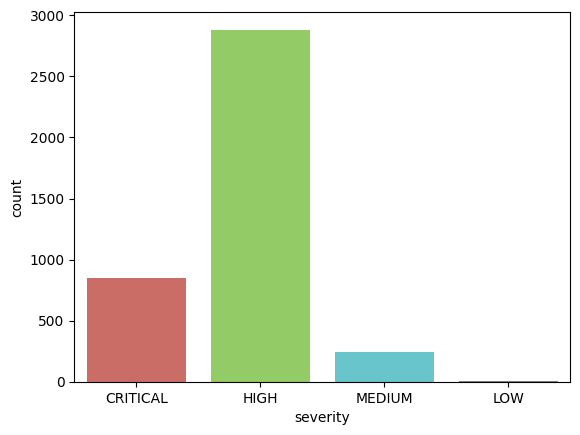

In [ ]:
# countplot for severity
sns.countplot(x='severity', data = df,palette='hls')

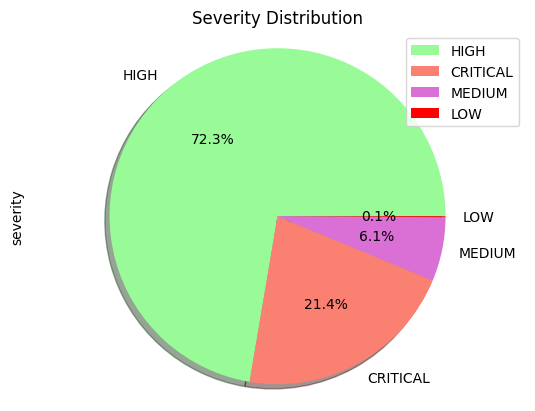

In [ ]:
#pie chart for Severity
colors = ['palegreen', 'salmon','orchid','red']  # Custom colors for the pie chart

df['severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)

plt.axis('equal')  # Set aspect ratio to make the pie circular
plt.title('Severity Distribution')
plt.legend()
plt.show()

In [ ]:
#severity counts
df['severity'].value_counts()

HIGH        2882
CRITICAL     853
MEDIUM       245
LOW            4
Name: severity, dtype: int64

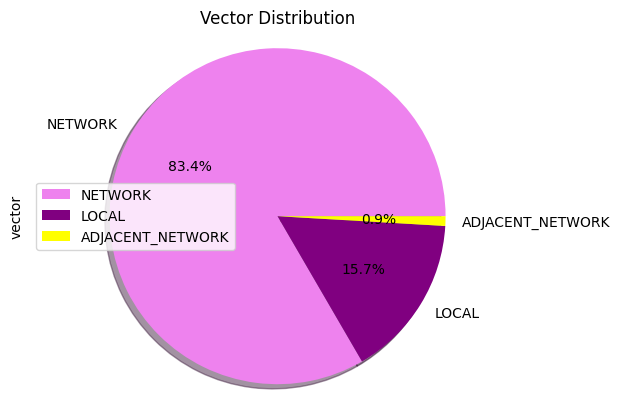

In [ ]:
#Vector Distribution
colors = ['violet', 'purple', 'yellow']  # Custom colors for the pie chart

df['vector'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)

plt.axis('equal')  # Set aspect ratio to make the pie circular
plt.title('Vector Distribution')
plt.legend()
plt.show()

In [ ]:
#Vector counts
df['vector'].value_counts()

NETWORK             3322
LOCAL                625
ADJACENT_NETWORK      37
Name: vector, dtype: int64

In [ ]:
#complexity count
df['complexity'].value_counts()

LOW     3758
HIGH     226
Name: complexity, dtype: int64

<Axes: xlabel='complexity', ylabel='count'>

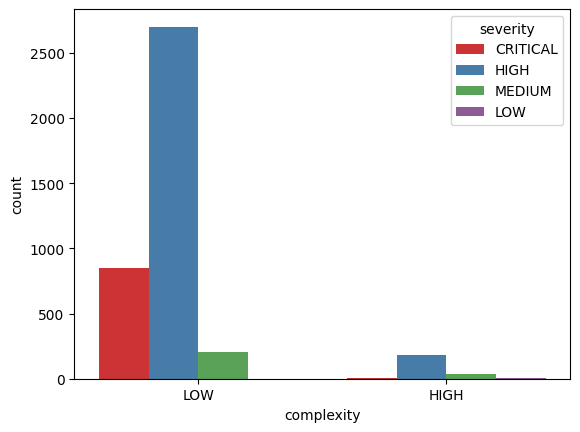

In [ ]:
#countplot for complexity
sns.countplot(x='complexity', hue="severity",data = df,palette='Set1')

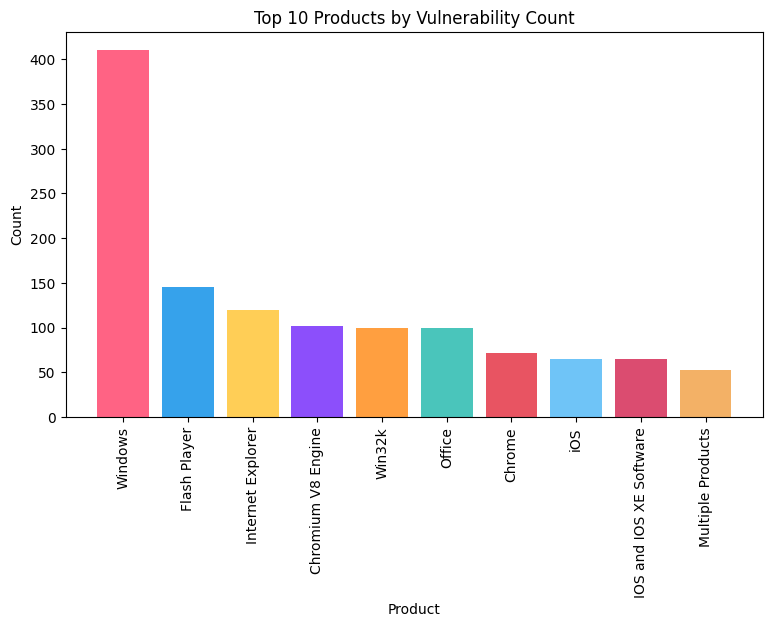

In [ ]:
#Top 10 product
plt.figure(figsize = (9,5))
product_counts = df['product'].value_counts().head(10)
colors = ['#FF6384', '#36A2EB', '#FFCE56', '#8C4FFB', '#FF9F40', '#4AC5BB', '#E85462', '#6FC4F7', '#DB4C70', '#F3B166']
plt.bar(product_counts.index, product_counts.values, color=colors)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products by Vulnerability Count')
plt.xticks(rotation=90)
plt.show()


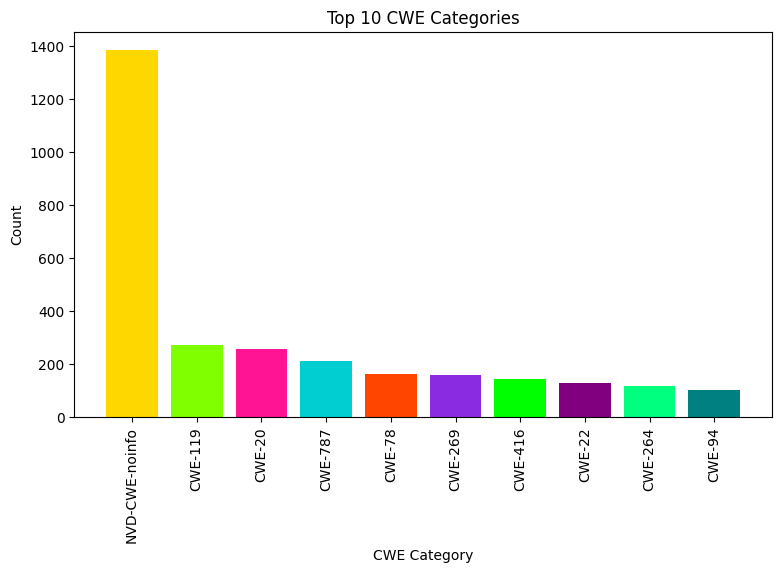

In [ ]:
#Top 10 Cwe Categories
plt.figure(figsize = (9,5))
colors = ['#FFD700', '#7FFF00', '#FF1493', '#00CED1', '#FF4500', '#8A2BE2', '#00FF00', '#800080', '#00FF7F', '#008080']
top_10_cwe = df['cwe'].value_counts().head(10)
plt.bar(top_10_cwe.index, top_10_cwe.values, color=colors)
plt.xlabel('CWE Category')
plt.ylabel('Count')
plt.title('Top 10 CWE Categories')
plt.xticks(rotation=90)
plt.show()


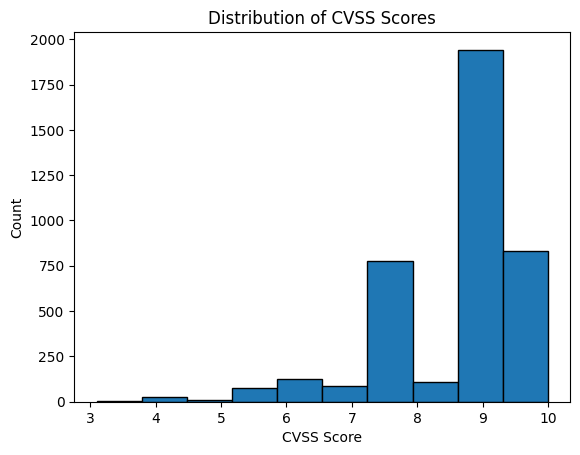

In [ ]:
#Distribution of CVSS
plt.hist(df['cvss'], bins=10, edgecolor='black')
plt.xlabel('CVSS Score')
plt.ylabel('Count')
plt.title('Distribution of CVSS Scores')
plt.show()


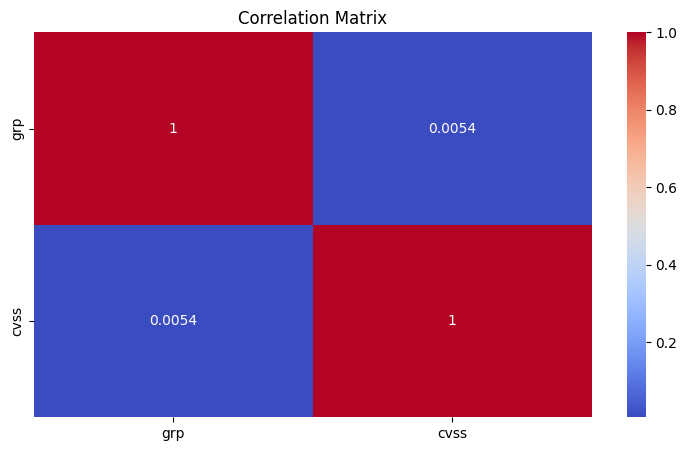

In [ ]:
#correlation plot
plt.figure(figsize = (9,5))
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3984 non-null   object 
 1   vendor_project      3984 non-null   object 
 2   product             3984 non-null   object 
 3   vulnerability_name  3984 non-null   object 
 4   date_added          3984 non-null   object 
 5   short_description   3984 non-null   object 
 6   required_action     3984 non-null   object 
 7   due_date            3984 non-null   object 
 8   grp                 3984 non-null   int64  
 9   pub_date            3984 non-null   object 
 10  cvss                3984 non-null   float64
 11  cwe                 3984 non-null   object 
 12  vector              3984 non-null   object 
 13  complexity          3984 non-null   object 
 14  severity            3984 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 467.0

In [ ]:
label_encoder = LabelEncoder()
df['cve_id'] = label_encoder.fit_transform(df['cve_id'])
df['vendor_project'] = label_encoder.fit_transform(df['vendor_project'])
df['product'] = label_encoder.fit_transform(df['product'])
df['vulnerability_name'] = label_encoder.fit_transform(df['vulnerability_name'])
df['due_date'] = pd.to_datetime(df['due_date']) # Convert date to datetime type
df['pub_date'] = pd.to_datetime(df['pub_date']) # Convert date to datetime type
df['date_added'] = pd.to_datetime(df['date_added']) # Convert date to datetime type
df['short_description'] = label_encoder.fit_transform(df['short_description'])
df['required_action'] = label_encoder.fit_transform(df['required_action'])
df['cwe'] = label_encoder.fit_transform(df['cwe'])
df['vector'] = label_encoder.fit_transform(df['vector'])
df['complexity'] = label_encoder.fit_transform(df['complexity'])
df['severity'] = label_encoder.fit_transform(df['severity'])

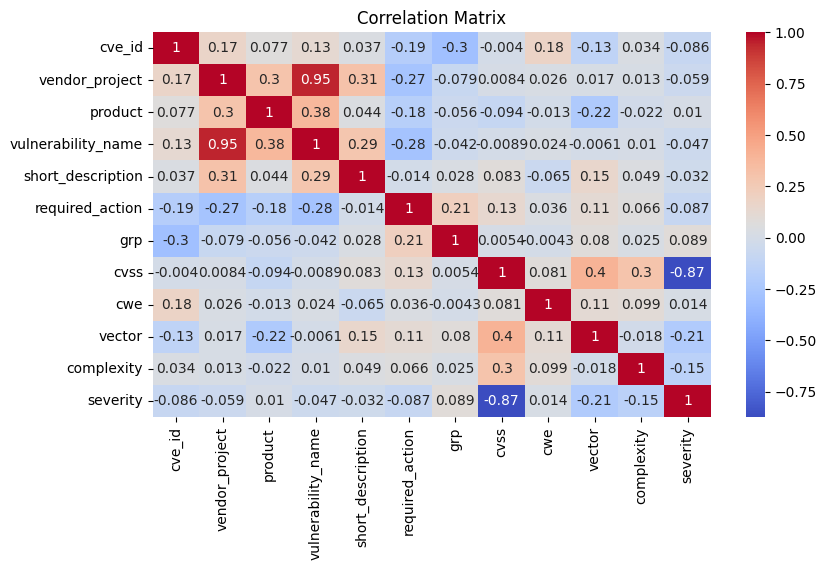

In [ ]:
#correlation plot
plt.figure(figsize = (9,5))
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = df.drop(['due_date', 'pub_date', 'date_added','cvss','cve_id'], axis=1)


In [ ]:
# Split the dataset into features and target variable
X = df.drop(['severity'], axis=1)
y = df['severity']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
#confusion matrix

Random Forest:
Accuracy: 0.9836888331242158
Precision: 0.9815370032224553
Recall: 0.9836888331242158
F1-score: 0.9815636320274107


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)



Decision Tree:
Accuracy: 0.9974905897114178
Precision: 0.995087962839371
Recall: 0.9974905897114178
F1-score: 0.9962631607659156


In [ ]:
# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')
print("AdaBoost:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1-score:", adaboost_f1)

AdaBoost:
Accuracy: 0.9435382685069009
Precision: 0.8911417816813049
Recall: 0.9435382685069009
F1-score: 0.9163616674562807


In [ ]:
# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
print("Support Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

Support Vector Machine:
Accuracy: 0.7277289836888331
Precision: 0.5295894737007819
Recall: 0.7277289836888331
F1-score: 0.6130469288881963


In [ ]:
# Multi Layer Perceptron
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions, average='weighted')
mlp_recall = recall_score(y_test, mlp_predictions, average='weighted')
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')
print("Multi Layer Perceptron:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)

Multi Layer Perceptron:
Accuracy: 0.7741530740276035
Precision: 0.8304851254976725
Recall: 0.7741530740276035
F1-score: 0.7853761673206954


In [ ]:
# Convert DataFrame to numpy array
X_train = X_train.values
X_test = X_test.values

# Reshape X_train and X_test
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(1, X_train.shape[2])))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
100/100 [==============================] - 7s 4ms/step - loss: 0.3962 - accuracy: 0.7051
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.7223
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2494 - accuracy: 0.7223
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 0.7223
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.7223
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.7223
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.7223
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.7223
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1580 - accuracy: 0.7223
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1576 - accuracy: 0.7223

In [ ]:
# Obtain predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = (lstm_predictions > 0.5).astype(int)
# Calculate accuracy and precision
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions, average='weighted')
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions, average='weighted')
lstm_recall = recall_score(y_test, lstm_predictions, average='weighted')
lstm_f1 = f1_score(y_test, lstm_predictions, average='weighted')
print("LSTM:")
print("Accuracy:", lstm_accuracy)
print("Precision:", lstm_precision)
print("Recall:", lstm_recall)
print("F1-score:", lstm_f1)


25/25 [==============================] - 0s 2ms/step
LSTM:
Accuracy: 0.7277289836888331
Precision: 0.5295894737007819
Recall: 0.7277289836888331
F1-score: 0.6130469288881963


In [ ]:
# Create an empty DataFrame
accuracy_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Append accuracy values to the DataFrame
accuracy_df = accuracy_df.append({'Model': 'Random Forest', 'Accuracy': rf_accuracy}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'Decision Tree', 'Accuracy': dt_accuracy}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'Support Vector Machine', 'Accuracy': adaboost_accuracy}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'Adaboost', 'Accuracy': adaboost_accuracy}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'MLP', 'Accuracy': mlp_accuracy}, ignore_index=True)
accuracy_df = accuracy_df.append({'Model': 'LSTM', 'Accuracy': lstm_accuracy}, ignore_index=True)

# Print the DataFrame
print(accuracy_df)

                    Model  Accuracy
0           Random Forest  0.983689
1           Decision Tree  0.997491
2  Support Vector Machine  0.943538
3                Adaboost  0.943538
4                     MLP  0.774153
5                    LSTM  0.727729


Text Classificaton using BERT

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/rukmininfo/jeffin/flipkart-customer-review-and-rating.zip')


In [ ]:
%cd '/content/drive/MyDrive/rukmininfo'

/content/drive/MyDrive/rukmininfo


In [ ]:
df1 = pd.read_csv('2022-12-09-enriched.csv')
df2 = pd.read_csv('2022-07-04-enriched.csv')
df3 = pd.read_csv('2022-06-27-enriched.csv')
df4 = pd.read_csv('2022-06-09-enriched.csv')
df5 = pd.read_csv('2022-06-08-enriched.csv')
data = pd.concat([df5,df4,df3,df2,df1], axis=0, ignore_index=True)

In [ ]:
data[:5]

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [ ]:
data.shape

(9976, 2)

In [ ]:
data.isnull().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
short_description       30
required_action          0
due_date                 0
notes                 3907
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

In [ ]:
data_new = data[:700]
data_new.shape

(700, 16)

In [ ]:
import nltk
import re
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.2 MB/s eta 0:00:00


In [ ]:
data_new.columns

Index(['cve_id', 'vendor_project', 'product', 'vulnerability_name',
       'date_added', 'short_description', 'required_action', 'due_date',
       'notes', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity',
       'severity'],
      dtype='object')

In [ ]:
# Have taken the columns "Required_action and severity"

df_brt = data_new[['required_action','severity']]

In [ ]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
texts_new = []
for t in df_brt.required_action:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))


In [ ]:
df_brt['text_clean'] = texts_new

<ipython-input-85-88d4da653f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brt['text_clean'] = texts_new


In [ ]:
df_brt

,required_action,severity,text_clean
0,Apply updates per vendor instructions.,CRITICAL,apply updates per vendor instructions
1,Apply updates per vendor instructions.,HIGH,apply updates per vendor instructions
2,Apply updates per vendor instructions.,CRITICAL,apply updates per vendor instructions
3,Apply updates per vendor instructions.,CRITICAL,apply updates per vendor instructions
4,Apply updates per vendor instructions.,HIGH,apply updates per vendor instructions
...,...,...,...
695,Apply updates per vendor instructions.,MEDIUM,apply updates per vendor instructions
696,Apply updates per vendor instructions.,LOW,apply updates per vendor instructions
697,Apply updates per vendor instructions.,MEDIUM,apply updates per vendor instructions
698,Apply updates per vendor instructions.,HIGH,apply updates per vendor instructions


In [ ]:
df_brt['text_clean'][1:8].values

array(['apply updates per vendor instructions',
       'apply updates per vendor instructions',
       'apply updates per vendor instructions',
       'apply updates per vendor instructions',
       'apply updates per vendor instructions',
       'apply updates per vendor instructions',
       'apply updates per vendor instructions'], dtype=object)

In [ ]:
data['severity'][:700].value_counts() # have taken only 700 records a mini dataframe. Please run with the whole dataset

HIGH        322
CRITICAL    204
MEDIUM       57
LOW           1
Name: severity, dtype: int64

In [ ]:
df_brt['severity'] = df_brt['severity'].map({'LOW':0,'MEDIUM':1,'CRITICAL':2,'HIGH':3})

In [ ]:
text_len = []
for text in df_brt.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
df_brt['text_len'] = text_len

In [ ]:
print(f" DF SHAPE: {df_brt.shape}")

 DF SHAPE: (700, 4)


In [ ]:
df_brt = df_brt[df_brt['text_len'] > 4]

In [ ]:
print(f" DF SHAPE: {df_brt.shape}")

 DF SHAPE: (700, 4)


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df_brt['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 120


In [ ]:
# Let's check the long tokenized sentences (with more than 80 tokens ):

token_lens = []

for i,txt in enumerate(df_brt['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")


In [ ]:
df_brt['token_lens'] = token_lens

In [ ]:
df_brt = df_brt.sort_values(by='token_lens', ascending=False)
df_brt.head(20)

,required_action,severity,text_clean,text_len,token_lens
308,For all affected software assets for which upd...,2.0,for all affected software assets for which upd...,42,48
620,Versions 6 and earlier for this product are en...,2.0,versions 6 and earlier for this product are en...,24,28
608,The impacted product is end-of-life and should...,2.0,the impacted product is endoflife and should b...,13,17
629,The impacted product is end-of-life and should...,NaN,the impacted product is endoflife and should b...,13,17
545,The impacted product is end-of-life and should...,3.0,the impacted product is endoflife and should b...,13,17
551,The impacted product is end-of-life and should...,2.0,the impacted product is endoflife and should b...,13,17
598,The impacted product is end-of-life and should...,NaN,the impacted product is endoflife and should b...,13,17
468,The impacted product is end-of-life and should...,NaN,the impacted product is endoflife and should b...,13,17
639,The impacted product is end-of-life and should...,2.0,the impacted product is endoflife and should b...,13,17
638,The impacted product is end-of-life and should...,2.0,the impacted product is endoflife and should b...,13,17


In [ ]:
df_brt['severity'] = df_brt['severity'].fillna(df_brt['severity'].mode()[0])


In [ ]:
df_brt['severity'].isna().sum()

0

In [ ]:
# The dataset looks more clean now. We will shuffle it and reset the index.
df_brt = df_brt.sample(frac=1).reset_index(drop=True)


Sentiment column analysis


In [ ]:
df_brt['severity'].value_counts()

3.0    438
2.0    204
1.0     57
0.0      1
Name: severity, dtype: int64

In [ ]:
# We note that the three classes are imbalanced. We will proceed with oversampling the train test, to remove bias towards the majority classes.

ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_brt['text_clean']).reshape(-1, 1), np.array(df_brt['severity']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'severity']);

In [ ]:
train_os['severity'].value_counts()

2.0    438
3.0    438
1.0    438
0.0    438
Name: severity, dtype: int64

In [ ]:
X = train_os['text_clean'].values
y = train_os['severity'].values

In [ ]:
X.shape

(1752,)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [ ]:
y_train.shape, y_valid.shape,X_valid.shape,X_train.shape

((1576,), (176,), (176,), (1576,))

In [ ]:
# One hot encoding. by using one hot encoding on the target variable we achieved higher accuracy.

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
# y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
# y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\n" )

TRAINING DATA: 1576
VALIDATION DATA: 176



In [ ]:
MAX_LEN=128

def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
# test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
val_input_ids.shape

(176, 128)

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(4, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)

    return model



In [ ]:
model1 = create_model(bert_model, MAX_LEN)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [ ]:
train_input_ids.shape

(1576, 128)

In [ ]:
y_train.shape, y_valid.shape

((1576, 4), (176, 4))

In [ ]:
history_bert = model1.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids, val_attention_masks],y_valid), epochs=2, batch_size=32)

# history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid,y_valid),batch_size=100,verbose=1,shuffle=1)

Epoch 1/2
50/50 [==============================] - 61s 843ms/step - loss: 1.4002 - categorical_accuracy: 0.2506 - val_loss: 1.3704 - val_categorical_accuracy: 0.2557
Epoch 2/2
50/50 [==============================] - 38s 767ms/step - loss: 1.3793 - categorical_accuracy: 0.2582 - val_loss: 1.3621 - val_categorical_accuracy: 0.2784


In [ ]:
# BERT results

result_bert1 = model1.predict([val_input_ids, val_attention_masks])

6/6 [==============================] - 6s 248ms/step


In [ ]:
y_pred_bert1 =  np.zeros_like(result_bert1)
y_pred_bert1[np.arange(len(y_pred_bert1)), result_bert1.argmax(1)] = 1

In [ ]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(4,4))
    labels=[0,1,2,3]
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17)
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

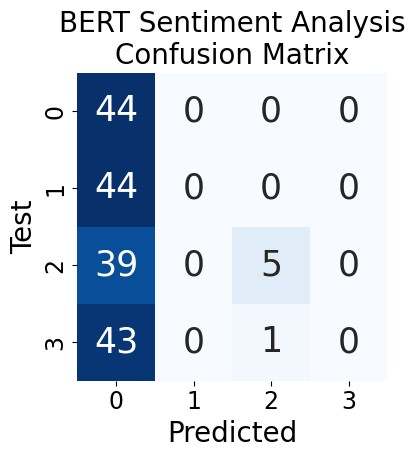

In [ ]:
conf_matrix(y_valid.argmax(1), y_pred_bert1.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_valid,y_pred_bert1))

	Classification Report for BERT:

               precision    recall  f1-score   support

           0       0.26      1.00      0.41        44
           1       0.00      0.00      0.00        44
           2       0.83      0.11      0.20        44
           3       0.00      0.00      0.00        44

   micro avg       0.28      0.28      0.28       176
   macro avg       0.27      0.28      0.15       176
weighted avg       0.27      0.28      0.15       176
 samples avg       0.28      0.28      0.28       176



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy = accuracy_score(y_valid, y_pred_bert1)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 27.841


For the better result please run the whole dataset and epochs inbetween(50,100).

In [ ]:
..............END.......................